# Scraping - Solutions

## Obtenir les derniers articles du Monde (**)

* Obtenir le titre et le chapeau (description) des derniers articles sur https://www.lemonde.fr/actualite-en-continu/ (*)
* Enregistrer les images correspondantes (***, @)

In [1]:
import requests
from bs4 import BeautifulSoup

**$\rightarrow$ Obtenir le titre et les chapeaux**

La première étape est de demander la page au serveur en utilisant la fonction `requests.get`.

In [2]:
page = requests.get("https://www.lemonde.fr/actualite-en-continu/")
print(page)

<Response [200]>


In [3]:
page.status_code

200

Noter le code de réponse : 200 = Success.

On peut afficher le contenu HTML de la page avec **l'attribut `content`**.

In [4]:
page.content

b'               <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="UTF-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <meta name="referrer" content="no-referrer-when-downgrade"> <meta name="theme-color" content="#ffffff">    <link rel="preconnect" href="//img.lemde.fr">   <link rel="preload" href="//www.lemonde.fr/dist/assets/fonts/marr-sans/MarrSans-Medium-Web.woff2" as="font" type="font/woff2" crossorigin> <link rel="preload" href="//www.lemonde.fr/dist/assets/fonts/marr-sans-cond/MarrSansCondensed-Medium-Web.woff2" as="font" type="font/woff2" crossorigin> <link rel="preload" href="//www.lemonde.fr/dist/assets/fonts/variables/the-antiqua-b/TheAntiquaB-LeMonde.woff2" as="font" type="font/woff2" crossorigin>  <link rel="manifest" href="/manifest.json"> <script>var lmd = {"consent":{"version":1},"context":{"aec":false,"pageType":"rubrique"},"user":false,"

L'étape suivante est d'utiliser BeautifulSoup pour parser ce document.

In [5]:
soup = BeautifulSoup(page.content)

print(soup.prettify()) # pour un meilleur affichage

<!DOCTYPE html>
<html lang="fr" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="no-referrer-when-downgrade" name="referrer"/>
  <meta content="#ffffff" name="theme-color"/>
  <link href="//img.lemde.fr" rel="preconnect"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/dist/assets/fonts/marr-sans/MarrSans-Medium-Web.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/dist/assets/fonts/marr-sans-cond/MarrSansCondensed-Medium-Web.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="//www.lemonde.fr/dist/assets/fonts/variables/the-antiqua-b/TheAntiquaB-LeMonde.woff2" rel="preload" type="font/woff2"/>
  <link href="/manifest.json" rel="manifest"/>
  <script>
   var lmd = {"consent":{"version":1},"context":{"aec":false,"pageType":"ru

On peut ensuite extraire le texte depuis les tags qui nous intéressent.

Pour connaître le noms des tags pertinents, on utilise l'inspecteur du navigateur. On va se concentrer sur la section `id="river"`, qui contient les articles : 

In [6]:
content = soup.find('section', {'id':'river'})
content

<section class="river river--en-continu river--short old__river" id="river"> <h2 class="river__title">Les derniers articles</h2> <section class="teaser teaser--inline-picture"> <figure class="teaser__figure teaser__figure--page"> <picture class="teaser__picture teaser__picture--3-2"> <source data-srcset="https://img.lemde.fr/2014/10/22/0/0/3500/2329/780/520/60/0/23ba0b5_15208-1auwh7e.jpg" media="(min-width: 576px)"> <img alt="" class="teaser__media" data-src="https://img.lemde.fr/2014/10/22/0/0/3500/2329/110/73/60/0/23ba0b5_15208-1auwh7e.jpg" height="74" width="110"/> <noscript> <img alt="" class="teaser__media" height="74" src="https://img.lemde.fr/2014/10/22/0/0/3500/2329/110/73/60/0/23ba0b5_15208-1auwh7e.jpg" width="110"/> </noscript> </source></picture> </figure> <a class="teaser__link" href="https://www.lemonde.fr/sante/article/2023/07/10/projet-d-hopital-grand-paris-nord-la-declaration-d-utilite-publique-annulee-par-le-tribunal-administratif_6181332_1651302.html"> <h3 class="teas

In [7]:
# Syntaxe alternative : la méthode select

content2 = soup.select("html body section#river .teaser")

# Cette méthode utilise la syntaxe CSS pour rechercher un tag.
# Elle est parfois plus rapide à écrire. Les tags successifs sont
# separés par des espaces, les # désignent une class et les . un id.
# On peut obtenir le chemin CSS avec clic droit dans l'inspecteur.

On isole les titres (`h3`) et les chapeaux (`p`, `class='teaser__desc'`) des articles :

In [8]:
titres = content.find_all('h3')
titres

[<h3 class="teaser__title">Projet d’hôpital Grand Paris-Nord : la déclaration d’utilité publique annulée par le tribunal administratif</h3>,
 <h3 class="teaser__title">Erdogan soutiendra l’entrée de la Suède dans l’OTAN si l’UE rouvre les discussions avec la Turquie</h3>,
 <h3 class="teaser__title">En Ukraine, des psychologues à l’écoute des civils traumatisés : « L’occupation russe les a verrouillés en eux-mêmes »</h3>,
 <h3 class="teaser__title">Les sauveteurs espagnols ont localisé une embarcation pouvant transporter « environ 200 » migrants au large des Canaries</h3>,
 <h3 class="teaser__title">Les assurances face au réchauffement climatique : « Aujourd’hui, un citoyen paie en moyenne 25 euros seulement pour être couvert contre les catastrophes naturelles »</h3>,
 <h3 class="teaser__title">Disparition d’Emile : course contre la montre pour retrouver l’enfant de 2 ans disparu</h3>,
 <h3 class="teaser__title">ZFE : assouplissement des restrictions de circulation dans les agglomératio

In [9]:
chapeaux = content.find_all('p', {'class': 'teaser__desc'})
chapeaux

[<p class="teaser__desc">La justice administrative était saisie d’un recours de riverains et de syndicats de soignants qui estiment le projet sous-dimensionné par rapport aux besoins de santé de la zone couverte, appelée à connaître une croissance démographique.</p>,
 <p class="teaser__desc">L’adhésion de l’Ukraine à l’OTAN aurait des conséquences « très négatives » pour la sécurité européenne, a affirmé lundi le porte-parole du Kremlin, Dmitri Peskov, à la veille d’un sommet de l’Alliance où sera débattue la candidature de Kiev.</p>,
 <p class="teaser__desc">A Sadove, dans le sud de l’Ukraine, les conséquences traumatiques de l’occupation et des violences subies restent très importantes. Des psychologues ukrainiennes du programme Clinique mobile tentent d’amener les habitants à libérer leur parole.</p>,
 <p class="teaser__desc">Les sauveteurs espagnols recherchent dans l’Atlantique environ 200 migrants partis du Sénégal il y a près de deux semaines.</p>,
 <p class="teaser__desc">Par r

In [10]:
titres[0].get_text()

'Projet d’hôpital Grand Paris-Nord\xa0: la déclaration d’utilité publique annulée par le tribunal administratif'

Le package `unidecode` permet de décoder les caractères unicode pour nettoyer le texte obtenu :

In [11]:
!pip install unidecode

In [12]:
from unidecode import unidecode

unidecode('Attentats de 2016 à Bruxelles\xa0: Salah Abdeslam et neuf\xa0autres inculpés renvoyés aux assises')

'Attentats de 2016 a Bruxelles : Salah Abdeslam et neuf autres inculpes renvoyes aux assises'

In [13]:
# Nettoyage sous forme de boucle
titres_clean = []
for t in titres:
    titres_clean.append( unidecode(t.get_text()) )
titres_clean

["Projet d'hopital Grand Paris-Nord : la declaration d'utilite publique annulee par le tribunal administratif",
 "Erdogan soutiendra l'entree de la Suede dans l'OTAN si l'UE rouvre les discussions avec la Turquie",
 "En Ukraine, des psychologues a l'ecoute des civils traumatises : << L'occupation russe les a verrouilles en eux-memes >>",
 'Les sauveteurs espagnols ont localise une embarcation pouvant transporter << environ 200 >> migrants au large des Canaries',
 "Les assurances face au rechauffement climatique : << Aujourd'hui, un citoyen paie en moyenne 25 euros seulement pour etre couvert contre les catastrophes naturelles >>",
 "Disparition d'Emile : course contre la montre pour retrouver l'enfant de 2 ans disparu",
 'ZFE : assouplissement des restrictions de circulation dans les agglomerations ou les seuils de pollution ne sont pas depasses',
 'Aux Pays-Bas, le premier ministre, Mark Rutte, annonce son retrait de la politique',
 "Sainte-Soline : la LDH conclut a la responsabilite 

In [ ]:
# Nettoyage sous forme de list comprehension (mieux)
titres = [ unidecode(t.get_text()) for t in titres ]
titres

In [ ]:
chapeaux = [unidecode(t.get_text()) for t in chapeaux]
chapeaux

Pour terminer, on peut éventuellement stocker les résultats dans un dataframe :

In [ ]:
import pandas as pd

In [ ]:
# Création du df à partir d'un dictionnaire
dico = {'titre':titres, 'chapeau':chapeaux}
pd.DataFrame(dico)

In [ ]:
# Création du df à partir d'une liste
df = pd.DataFrame([titres, chapeaux]).T
df.columns = ['titre', 'chapeau']
df

In [ ]:
# Utilisation de zip
list(zip(titres, chapeaux))

_Note :_ jusqu'à maintenant, on a raisonné en cherchant tous les titres, puis tous les chapeaux, puis en les rassemblant. On aurait pu raisonner autrement, avec une approche plus "bottom-up" : chercher le titre et le chapeau d'un seul article, puis utiliser une boucle pour appliquer les calculs à tous les articles.

In [ ]:
# Approche "bottom-up" : boucle pour extraire les infos de chaque article

articles = []
for article in content:
    try:
        title = article.find('h3').get_text()
        title = unidecode(title)
        chapeau = article.find('p').get_text(strip=True)
        chapeau = unidecode(chapeau)
        articles.append([title, chapeau])
    except:
        continue

pd.DataFrame(articles, columns=['titres', 'chapeaux'])

In [ ]:
len(articles)

<br>

**$\rightarrow$ Télécharger les images** (***, @)

On commence par rechercher toutes les images de la section river :

In [ ]:
images = soup.find_all('img', src=True)
images

In [ ]:
# Syntaxe CSS 
images = soup.select("html body section#river img[src^=http]")
images

On extrait les liens, avec la sélection d'un attribut du tag (attribut `src`) :

In [ ]:
links = [ link['src'] for link in images ]
links

Et enfin on enregistre les images grâce à ces liens. La syntaxe pour enregistrer des images utilise `with open()`, et elle n'est pas forcément intuitive :

In [ ]:
import os
os.makedirs('images') # créer le dossier images

for i, link in enumerate(links): 
    with open(f'images/my_image_{i}.jpg', 'wb') as dest:
        img = requests.get(link)
        dest.write( img.content )

## Le beau temps fait-il le bonheur ? (**)

Les gens sont-ils plus heureux dans les pays ensoleillés ? Y a-t-il un lien entre le taux de dépression et le manque de soleil ? Intéressons-nous aux données pour répondre à cette question.

<br>

**_Hypothèse :_**

Moins un pays compte d'heures d'ensoleillement, plus le taux d'individus déprimés est élevé.

**_Data à collecter :_**
* Noms de pays
* Taux de personnes déprimées
* Moyenne des heures d'ensoleillement 

**_Ressources à utiliser :_**
* https://en.wikipedia.org/wiki/Epidemiology_of_depression
* https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

**_Questions :_**

1. Scraper les 2 tables (taux d'individus déprimés et heures d'ensoleillement). (**)
2. Nettoyer les données et calculer les moyennes annuelles d'ensoleillement par pays. (**)
3. Fusionner les tables. (*)
4. Afficher la corrélation à l'aide d'un scatter plot (`sns.scatterplot`). (*)

<br>

_**INDICES :**_

Dans cet exercice, nous scrapons des tables sur un site web. Pour cette tâche, on peut utiliser BeautifulSoup comme d'habitude, ou utiliser la fonction pandas **`pd.read_html()`** qui est plus rapide (meilleure solution ici). Après avoir scrapé les données des articles, il reste simplement à les fusionner et à étudier la corrélation.

<br>

**$\rightarrow$ Dépression**

Commençons par regarder les taux de personnes déprimées. Les données sont stockées dans une seule table. On peut donc utiliser **BeautifulSoup** pour parser le code HTML, et naviguer entre les différents tags qui constituent la table. La méthode pandas `pd.read_html()` peut aussi nous simplifier la tâche, et est donc préférable ici.


* **Methode 1 : avec pandas**

In [30]:
import pandas as pd

In [34]:
depression = pd.read_html('https://en.wikipedia.org/wiki/Epidemiology_of_depression')[0]
depression

,Rank,Country,DALY rate
0,1,United States,1454.740
1,2,Nepal,1424.480
2,3,East Timor,1404.100
3,4,Bangladesh,1401.530
4,5,India,1400.840
...,...,...,...
187,188,Portugal,721.798
188,189,Côte d'Ivoire,714.969
189,190,Greece,632.054
190,191,Spain,620.772


La fonction donne une liste de plusieurs tables tirées de la page - on a uniquement besoin de la première.


* **Méthode 2 avec BeautifulSoup**

On télécharge la page avec `requests.get` puis on la parse.

In [ ]:
import requests
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/Epidemiology_of_depression')
print(page)
soup = BeautifulSoup(page.content)

In [ ]:
table = soup.find('table') # on veut le premier tag 'table'

On peut voir dans l'inspecteur que les lignes du tableau sont contenues dans les tags `<tr>` (pour "table row"), qui eux mêmes contiennent des tags `<td>` ("table data"). Il y a trois tags `<td>` par ligne, correspondant aux trois colonnes. On va donc regarder le tableau ligne par ligne et extraire les informations des tags `<td>`. On les stocke au fur et à mesure dans 3 listes.

In [ ]:
# Récupérer toutes les lignes 
rows = table.find_all('tr')

# Initialiser les listes
ranks = []
rates = []
countries = []
links = []

In [ ]:
# Boucler sur les lignes pour extraire les données des cellules

for row in rows[1:]: # On commence juste après la ligne header 
    
    cells = row.find_all('td')

    rank = cells[0]
    ranks.append(rank.text)

    country = cells[1]
    countries.append(country.text)

    rate = cells[2]
    rates.append(rate.text)

Reste le formating : 

In [ ]:
from unidecode import unidecode

countries = [unidecode(str(country)).strip() for country in countries]

rates = [float(rates[0].replace(',','')) for rate in rates]

On peut enfin reconstruire la table : 

In [ ]:
depression2 = pd.DataFrame(ranks, index=countries, columns=['Rank'])
depression2['DALY rate'] = rates
depression2.head()

<br>

**$\rightarrow$ Ensoleillement**

On effectue le même travail sur l'autre article qui compte les heures de soleil par pays : 

In [39]:
sun = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration')
sun

[    0                                                  1
 0 NaN  This article may be too long to read and navig...,
                Country          City    Jan    Feb    Mar    Apr    May  \
 0          Ivory Coast        Gagnoa  183.0  180.0  196.0  188.0  181.0   
 1          Ivory Coast        Bouaké  242.0  224.0  219.0  194.0  208.0   
 2          Ivory Coast       Abidjan  223.0  223.0  239.0  214.0  205.0   
 3          Ivory Coast       Odienné  242.0  220.2  217.3  214.7  248.8   
 4          Ivory Coast         Ferké  279.0  249.0  253.0  229.0  251.0   
 ..                 ...           ...    ...    ...    ...    ...    ...   
 106      Guinea-Bissau        Bissau  248.0  226.0  279.0  270.0  248.0   
 107  Equatorial Guinea          Bata  201.5  192.1  173.6  177.0  189.1   
 108  Equatorial Guinea        Malabo  148.8  152.5  108.5  120.0  117.8   
 109            Namibia  Keetmanshoop  353.0  300.0  312.0  306.0  304.0   
 110            Namibia      Windhoek  288.0  2

In [40]:
len(sun)

7

Nous avons un tableau par continent. On les concatène donc tous en un seul. Tous les tableaux de données partagent les mêmes colonnes, la concaténation est donc facile.

In [41]:
sun = pd.concat(sun[1:]) # on saute le premier tableau, qui est vide
sun.reset_index()

,index,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Unnamed: 16
0,0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0,[2],NaN
1,1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0,[2],NaN
2,2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0,[2],NaN
3,3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6,[3],NaN
4,4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0,[2],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,11,New Zealand,Christchurch,224.4,190.5,177.4,155.6,133.3,117.7,124.8,149.0,166.6,201.3,215.3,214.3,2070.2,?,NaN
375,12,New Zealand,Wellington,240.3,205.0,194.7,153.8,126.0,102.3,111.4,137.2,163.2,191.1,210.8,222.9,2058.7,?,NaN
376,13,New Zealand,Dunedin,179.6,158.0,146.1,125.9,108.4,95.3,110.6,122.2,136.8,165.5,166.9,168.3,1683.7,[185],NaN
377,14,Papua New Guinea,Port Moresby,182.0,158.0,184.0,200.0,211.0,200.0,203.0,222.0,213.0,231.0,243.0,216.0,2463.0,NaN,NaN


On voit qu'il existe des données pour plusieurs villes par pays, et 1 mesure par mois. On calcule une simple moyenne annuelle d'ensoleillement par pays.

In [42]:
sun_country = sun.groupby('Country').mean()
sun_country

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Unnamed: 16
Country,,,,,,,,,,,,,,
Afghanistan,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.70,303.900000,282.600000,253.200000,182.400000,3175.100000,NaN
Albania,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.000000,327.00,264.000000,218.000000,127.000000,88.000000,2544.000000,NaN
Algeria,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.250000,325.35,262.500000,269.500000,225.000000,204.400000,3266.500000,NaN
Angola,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.000000,150.00,145.000000,164.000000,199.000000,212.000000,2341.000000,NaN
Argentina,238.250000,207.066667,185.050000,170.616667,151.466667,123.383333,138.616667,170.40,174.600000,208.566667,222.833333,229.450000,2220.300000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,117.800000,127.100000,164.300000,216.000000,303.800000,363.000000,384.400000,365.80,300.000000,226.300000,150.000000,105.400000,2823.900000,NaN
Venezuela,259.133333,243.900000,261.700000,224.666667,217.400000,212.333333,248.100000,248.00,245.833333,251.400000,239.000000,243.933333,2895.300000,NaN
Vietnam,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.250000,175.00,161.750000,158.500000,157.250000,167.000000,2123.500000,NaN


La fonction `groupby`saute automatiquement les colonnes non numériques, c'est exactement ce qu'on veut.

In [43]:
sun_average = sun_country.mean(axis=1) # axis = 1 to compute the mean per row
sun_average = sun_average.reset_index()
sun_average

,Country,0
0,Afghanistan,488.476923
1,Albania,391.384615
2,Algeria,503.119231
3,Angola,360.076923
4,Argentina,341.584615
...,...,...
135,Uzbekistan,434.446154
136,Venezuela,445.438462
137,Vietnam,326.673077
138,Zambia,456.225641


<br>

**$\rightarrow$ Fusion**

On peut maintenant fusionner nos deux datasets proprement construits : 

In [44]:
data = depression.merge(sun_average)
data

,Rank,Country,DALY rate,0
0,1,United States,1454.740,435.018234
1,4,Bangladesh,1401.530,317.846154
2,5,India,1400.840,387.233846
3,6,Pakistan,1400.420,478.487179
4,7,Brazil,1396.100,344.243357
...,...,...,...,...
120,187,Uganda,722.676,354.461538
121,188,Portugal,721.798,426.179487
122,190,Greece,632.054,426.615385
123,191,Spain,620.772,430.646154


Pandas identifie automatiquement le colonne commune. Cependant nous n'avons que 125 lignes, ce qui veut dire que certains pays n'ont pas fusionné correctement (et `pd.merge`a effectué un inner join, il a laisse de côté les pays sans correspondance dans l'autre tableau). On pourrait essayer d'améliorer la fusion plus tard en vérifiant que les noms de pays correspondent bien.

In [45]:
data = data.drop('Rank', axis=1)
data.columns = ['country', 'depression', 'sunshine']
data

,country,depression,sunshine
0,United States,1454.740,435.018234
1,Bangladesh,1401.530,317.846154
2,India,1400.840,387.233846
3,Pakistan,1400.420,478.487179
4,Brazil,1396.100,344.243357
...,...,...,...
120,Uganda,722.676,354.461538
121,Portugal,721.798,426.179487
122,Greece,632.054,426.615385
123,Spain,620.772,430.646154


<br>

**$\rightarrow$ Calcul et affichage de la corrélation**

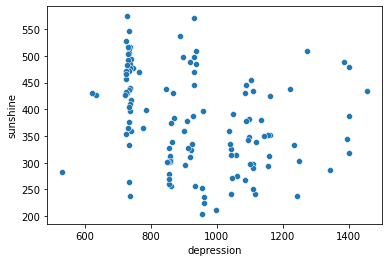

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='depression', y='sunshine');

La corrélation n'a pas l'air très importante..

Regardons les coefficients :

In [47]:
data.corr()

,depression,sunshine
depression,1.000000,-0.269574
sunshine,-0.269574,1.000000


<br>

**$\rightarrow$ CONCLUSION**

Le coefficient de corrélation est à -0.26, ce qui signifie qu'il existe une **légère corrélation négative** entre taux d'ensoleillement et dépression — cela correspond à ce à quoi on s'attendait.

Cependant la corrélation n'est pas aussi importante qu'on aurait pu le croire, en tout cas **rien ne permet d'interpréter cette corrélation comme une causalité**.

Pour améliorer notre analyse, il serait intéressant de prendre en compte des **variables additionnelles**, comme la taille des pays, le PIB, la population, etc. Voilà une piste pour un projets personnel !

## Encyclopedia (***)

On souhaite constituer une encyclopédie au cas où Wikipedia disparaîtrait. 

Pour cela, nous avons besoin d'une importante base d'articles pour que notre encyclopédie soit viable. Nous allons donc nous référer à l'article wikipédia qui liste les articles que toute bonne encyclopédie devrait posséder : https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Liste_d%27articles_que_toutes_les_encyclop%C3%A9dies_devraient_avoir.

L'objectif de l'exercice est de sauvegarder cette liste d'articles au bon format, c'est-à-dire en préservant la hiérarchie des articles en sections et sous-sections. 

_Indice : Le dictionnaire pourrait être un bon format._

In [ ]:
# Reqête et parsing
page = requests.get('https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Liste_d%27articles_que_toutes_les_encyclop%C3%A9dies_devraient_avoir')
print(page)
soup = BeautifulSoup(page.content)

En explorant le code HTML de la page dans l'inspecteur, on voit que tout le contenu de l'article est stockée dans `<div class="mw-parser-output">`. On va donc se concentrer sur cette partie du code HTML.

In [ ]:
content = soup.find('div', {"class":"mw-parser-output"})

On voit aussi dans l'inspecteur que les noms de sections ('Biographies', 'Religion', etc.) sont stockées dans des tags `<h2>`, les sous-sections dans des tags `<h3>`, et les titres d'articles dans des tags `<div>`. 

Malheureusement, la difficulté est que tous ces tags se trouvent au même niveau hiérarchique. On va donc **itérer** sur tous ce tags, et en fonction du tag lu, enregistrer son contenu dans un **dictionnaire** au bon niveau hiérarchique.

In [ ]:
# Exemple d'une bonne structure pour nos articles : 

articles = {'Biographies': {'Artiste': [Dali, Monet, ...],
                            'Chanteur': [Johnny, Madonna, ...]},
           'Histoire':,
           'Geographie':}

Expérimentons un peu avant de coder notre boucle finale : 

In [ ]:
# Récupérer tous les titres et sous-titres de sections (tags h2 et h3)
[ article.get_text() for article in soup.find_all('span', {'class':'mw-headline'}) ]

In [ ]:
# Clean l'un des titres 

print(list(content)[12].get_text()) # exemple de titre (h3)

list(content)[12].get_text().split(' (')[0]

In [ ]:
# Quand on tombe sur un tag div, récupérer tous les noms d'articles

div = list(content)[10] # exemple de tag div

[element.get_text() for element in div.find_all('li')]

Boucle finale : 

In [ ]:
articles = {}

for tag in content:
    
    # Si h2, créer une nouvelle clé contenant un dictionnaire
    if tag.name == 'h2':
        section = tag.get_text()
        section = section.split(' (')[0]
        articles[section] = {}
    
    # Si h3, créer une nouvelle clé dans le sous-dictionnaire
    elif tag.name == 'h3':
        subsection = tag.get_text()
        subsection = subsection.split(' (')[0]
        articles[section][subsection] = []
    
    # Si div, extraire les <li> et les insérer sous forme de liste 
    elif tag.name == 'div':
        try:
            tag['class'] == 'colonnes'
            titles = tag.find_all('li')
            titles = [x.get_text() for x in titles]
            articles[section][subsection] = titles
        except: 
            continue

In [ ]:
articles

## Choisir son futur ordinateur (***)

**_[MAJ] Boulanger vient de modifier le code du site et de mettre en place des mesures anti-scraping. Cet exercice ne peut donc plus être effectué en l'état. MAJ à venir avec un autre site de vente d'informatique équivalent._**

Supposons que vous souhaitiez changer d'ordinateur. Vous utilisez vos nouvelles compétences en scraping pour réaliser une étude des références disponibles sur le site **Boulanger**.

* Scraper la première page de la catégorie  **[ultrabooks](https://www.boulanger.com/c/ultrabook-ultra-portable)**. Pour chaque produit de la page, récupérer son nom, son prix, la réduction s'il y en a une, le nombre d'étoiles et les caractéristiques principales. Sauvegarder ces informations dans un fichier csv.
* Faire la même chose avec toutes les pages de la catégorie ultrabooks.

_Indice : Partir de l'URL : https://www.boulanger.com/c/ultrabook-ultra-portable. La première question est réalisable sans ouvrir chaque page de produit._

In [ ]:
# Scraper et parser la page 
url = 'https://www.boulanger.com/c/ultrabook-ultra-portable'
page = requests.get(url)
print(page)
soup = BeautifulSoup(page.content)

**$\rightarrow$ Scraper la première page de la catégorie ultrabooks**

On commence par extraire les blocs de HTML correspondant aux produits de la page, qu'on stocke dans une liste.

In [ ]:
print(soup.prettify())

In [ ]:
products = soup.find('section', {'id':'product-list'})
products = [p for p in products if p != '\n'] # ne pas garder les sauts de ligne
products

In [ ]:
products = soup.find('div', {'class':'productListe'})
products = [p for p in products if p != '\n'] # ne pas garder les sauts de ligne
products

On va pouvoir ensuite réaliser une boucle sur cette liste, pour extraire au fur et à mesure les informations requises sur chaque produit. 

Les informations sont stockées à chaque fois dans une liste (sorte de "fiche produit"), qui vient compléter petit à petit un dictionnaire de tous les produits.

In [ ]:
from tqdm import tqdm # permet d'afficher une barre de progression d'une boucle

In [ ]:
# Extraction des informations désirées

product_details = {} # On remplit un dict, plus facile à convertir en df
for i, p in tqdm(enumerate(products)):
    
    ### PRIX ###
    price = p.find('p', {"class":"fix-price"}).get_text().strip()
    price = float(price[:-1].replace(',', '.')) # convertir str en float
    
    ### DISCOUNT ###
    # Structure try/except dans le cas où on ne trouve pas de réduction
    try:
        discount = p.find('span', {'class':'priceDiscount on'}).text.strip()
        discount = float(discount[1:-1]) / 100 # convertir str en float
    except:
        discount = float('nan')
    
    ### NOM ###
    name = p.find('h2').get_text(' ', strip=True) # ' ' = séparateur entre les blocs de texte
    
    ### RATING ### 
    try:
        stars = p.find('a', {"class":"unlink"}).find('p')['class']
        stars = stars[2][-2:] # la note est affichée sous la forme '43'
        stars = float(stars[0] + '.' + stars[1]) # conversion en '4.3'
    except:
        stars = float('nan')
    
    ### CARACTERISTIQUES ###
    carac = p.find('div', {"class":"carac"}).get_text('\n', strip=True)
    carac = carac.replace('\t', '') # supprimer les \t restants
    
    ### Tout ajouter au dictionnaire final ###
    product_details[i] = [price, discount, name, stars, carac]

product_details

Pour terminer, ce dictionnaire est transformé en dataframe, qui peut être enregistré au format csv.

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(product_details, orient='index', columns=['price', 'discount', 'name', 'rating', 'caracteristics'])
df

In [ ]:
df.to_csv('boulanger.csv', index=False)

**$\rightarrow$ Scraper toutes les pages de la catégorie ultrabooks**

La première option consiste à observer que toutes les pages de la catégorie ultrabooks ont des URL similaires. Il n'y a que le numéro de page à la fin de l'URL qui change : `'https://www.boulanger.com/c/ultrabook-ultra-portable?numPage=2'`. 

On peut donc facilement construire artificiellement les URLs des pages suivantes et appliquer le code de la question précédente à toutes les pages, dans une boucle. 

La 2ème solution, plus complexe (donc moins bonne), serait d'utiliser `selenium` pour automatiquement clique sur la page suivante.

In [ ]:
# Rassembler tout le code de la question précédente dans une fonction

def scrape_boulanger(url):
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    products = soup.find('div', {'class':'productListe'})
    products = [p for p in products if p != '\n']
    
    product_details = {}
    for i, p in enumerate(products):
    
        ### PRIX ###
        price = p.find('p', {"class":"fix-price"}).get_text().strip()
        price = float(price[:-1].replace(',', '.')) 

        ### DISCOUNT ###
        try:
            discount = p.find('span', {'class':'priceDiscount on'}).text.strip()
            discount = float(discount[1:-1]) / 100
        except:
            discount = float('nan')

        ### NOM ###
        name = p.find('h2').get_text(' ', strip=True)

        ### RATING ### 
        try:
            stars = p.find('a', {"class":"unlink"}).find('p')['class']
            stars = stars[2][-2:] 
            stars = float(stars[0] + '.' + stars[1])
        except:
            stars = float('nan')

        ### CARACTERISTIQUES ###
        carac = p.find('div', {"class":"carac"}).get_text('\n', strip=True)
        carac = carac.replace('\t', '') 

        product_details[i] = [price, discount, name, stars, carac]
    
    return product_details

On ne sait pas forcément combien de pages sont contenues dans la catégorie, on va donc effectuer notre la boucle à l'infini (**`while True`**) jusqu'à ce qu'une erreur déclenche un `break` (**`except: break`**).

In [ ]:
# Appliquer cette fonction à toutes les pages

i = 1 # compteur de pages
product_details = [] # liste de résultats 

while True:
    
    try:
        url_i = url + '?numPage=' + str(i)          # créer l'URL de la page
        product_details_i = scrape_boulanger(url_i) # utiliser notre fonction
        product_details.append(product_details_i)   # stocker les résultats
        i += 1                                      # augmenter le compteur

    except:
        break

product_details

Cette fois-ci, on a stocké la résultats dans une liste, qui contient donc 1 dictionnaire de produits par page scrapée.

On ne peut pas fusionner ces dictionnaires car ils ont tous les mêmes clés ("Produit 1", "Produit 2", etc., pour chaque page). 

On va donc construire un dataframe par dictionnaire, puis les concaténer pour obtenir le résultat final.

In [ ]:
# Transformer le dictionnaire de chaque page en dataframe
# On obtient une liste de dataframes
product_details_dfs = [pd.DataFrame.from_dict(d, 
                                              orient='index',
                                              columns=['price', 'discount', 'name', 'rating', 'caracteristics']
                                             ) for d in product_details]

# Concaténer les dataframes
final_df = pd.concat(product_details_dfs, axis=0)

# Classer les produits par prix, réduction et note
final_df.sort_values(['price', 'discount', 'rating'], ascending=[True, False, False]).reset_index(drop=True)

## BONUS : Le chasseur d'opportunités (*****, hacker level)

Enregistrer le contenu de toutes les offres de poste contenant "Data Analyst" sur Welcome to the jungle.

Cette tâche est rendue très compliquée par les méthodes anti-scraping mises en place par Welcome to the jungle.

*__Marche à suivre__*

L'URL à utiliser pour cet exercice est : 
https://www.welcometothejungle.com/fr/jobs?page=1&refinementList%5Bprofession_name.fr.Tech%5D%5B%5D=Data%20Analysis&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI

On peut remarquer que : 

1. Il y a plusieurs pages de résultats, que l'on peut parcourir simplement **en changeant `page=k` dans l'URL**. Il y a **30 postes proposés par page** de résultats.
<br><br>
2. Welcome to the jungle a implémenté des mesures anti-scraping. En particulier, une partie du HTML est cachée lorsque l'on requête la page avec  `requests`. Il est indispensable de **commencer à scroller** la page pour lancer le code JavaScript qui révèle le contenu caché.
<br><br>
$\rightarrow$ Pour résoudre ce problème, on ne peut se contenter de BeautifulSoup. Il faut **Simuler le comportement d'une vraie personne** qui parcourt la page avec sa souris, c'est donc **Selenium** qu'il nous faut
<br><br>
$\rightarrow$ Voilà une fonction qui permet de simuler un scroll de page jusqu'à la ième offre d'emploi :
<br><br>
```
def scroll(driver, i):
        scroll_delta = int(250)
        scroll_delta += 140*i
        driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")
```
<br>

3. Une autre mesure anti-scraping concerne les noms de classes, les ids et même les liens vers des images dans le code HTML. Tous ces noms sont aléatoires (ex:`class="sc-1flb27e-5 cdtiMs"`) et changent à chaque chargement de la page.<br><br>
$\rightarrow$ Une bonne nouvelle quand même : toutes les classes ne sont pas aléatoires, certaines restent fixes. Pour les noms aléatoires, certaines lettres du nom sont fixes également. On peut donc toujours utiliser des similarités pour désigner certains tags spécifiques (ex : le tag header, contenant le nombre total de résultats, commence toujours par "hd").<br><br>
$\rightarrow$ Pour exploiter cette faille, il est conseillé d'utiliser la méthode Selenium **`find_elements_by_css_selector()`** pour désigner des tags précis, car cette méthode permet de d'identifier un tag par un texte partiel (ex: `driver.find_elements_by_css_selector("header[class^='hd']")` pour toutes les classes de headers qui commencent par "hd").
<br><br>
4. Au bout du compte, on souhaite sauvegarder le contenu de chaque offre d'emploi dans un fichier .txt.<br><br>
$\rightarrow$ Il va donc falloir cliquer sur chaque offre d'emploi avec la méthode **`.click()`** de Selenium. Pour chaque offre d'emploi, le contenu de l'offre est stocké dans un dictionnaire à l'intérieur d'un tag `<script>`. On peut utiliser la méthode  **`json.loads()`** pour manipuler ce dictionnaire. On peut finalement l'enregistrer en .txt avec les fonctions **`open()`** et **`.write`**. 

In [ ]:
# importations nécessaires

import time
import json

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager

* Version linéaire (sous forme de fonctions)

In [ ]:
def MainPage(driver, url):
    '''Go the the first page'''
    driver.get(url)
    time.sleep(3)
        
def scroll(driver, i):
    scroll_delta = int(250)
    scroll_delta += 140*i
    driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")

def nbOffers(driver):
    nb_offers = driver.find_elements_by_css_selector("header[class^='hd']")[0].text
    nb_offers = int(nb_offers.split(' ')[0])
    return nb_offers

def Click(driver, pos):
    '''Click on the link'''
    driver.find_elements_by_css_selector("li[class^='ais-Hits-list-item']")[pos].click()
    time.sleep(2)

def GetText(driver, jobs):
    
    data = requests.get(driver.current_url)
    soup = BeautifulSoup(data.text, 'html.parser')
    
    info = soup.find("main").find_all('script')
    job = json.loads(str(info[0].string))
    faq = json.loads(str(info[1].string))
    job['content']['FAQPage'] = faq['content']['mainEntity']

    jobs.append(job)
    f = open('wttj.txt', 'a')
    f.write(str(job))
    f.write('\n')
    f.close() 

In [ ]:
# création du driver selenium
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.wait = WebDriverWait(driver, 1)

In [ ]:
# ouverture de la page et récupération du nombre d'offres
url = f"https://www.welcometothejungle.com/fr/jobs?page=1&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
MainPage(driver, url)
nb_offers = nbOffers(driver)

In [ ]:
# boucle de scraping
counter = 1
jobs = []
for i in range (1, (nb_offers // 30) + 1): 
    url = f"https://www.welcometothejungle.com/fr/jobs?page={i}&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
    for j in range(0,30):
        MainPage(driver, url)
        scroll(driver, j)
        Click(driver, j)
        GetText(driver, jobs)
        print(f"\r{counter}/{nb_offers}", end='')
        counter += 1

* Version orientée objet (sous forme de classe)

In [ ]:
class WTTJcrapper():

    def __init__(self):
        '''Init bot'''
        self.driver = webdriver.Chrome(ChromeDriverManager().install())
        self.driver.wait = WebDriverWait(self.driver, 1)
        self.jobs = []

    def MainPage(self, url):
        '''Go the the first page'''
        self.driver.get(url)
        time.sleep(3)
        
    def scroll(self,i):
        scroll_delta = int(250)
        scroll_delta += 140*i
        self.driver.execute_script("window.scrollBy(0, "+ str(scroll_delta) + ")")
    
    def nbOffers(self):
        nb = self.driver.find_elements_by_css_selector("header[class^='hd']")[0].text
        self.nb_offers = int(nb.split(' ')[0])

    def Click(self, pos):
        '''Click on the link'''
        self.driver.find_elements_by_css_selector("li[class^='ais-Hits-list-item']")[pos].click()
        time.sleep(2)
        
    def GetText(self):
        data = requests.get(self.driver.current_url)
        soup = BeautifulSoup(data.text, 'html.parser')
        info = soup.find("main").find_all('script')
        job = json.loads(str(info[0].string))
        faq = json.loads(str(info[1].string))
        job['content']['FAQPage'] = faq['content']['mainEntity']
        
        self.jobs.append(job)
        f = open('wttj.txt', 'a')
        f.write(str(job))
        f.write('\n')
        f.close() 

In [ ]:
# nombre d'offres
url = f"https://www.welcometothejungle.com/fr/jobs?page=1&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
L = WTTJcrapper()
L.MainPage(url)
L.nbOffers()
counter = 1

# scraping 
for i in range (1, (L.nb_offers // 30) + 1): 
    url = f"https://www.welcometothejungle.com/fr/jobs?page={i}&configure%5Bfilters%5D=website.reference%3Awttj_fr&configure%5BhitsPerPage%5D=30&aroundQuery=France&refinementList%5Boffice.country_code%5D%5B%5D=FR&refinementList%5Bcontract_type_names.fr%5D%5B%5D=CDI&refinementList%5Bcontract_type_names.fr%5D%5B%5D=Stage&query=%22data%20analyst%22&range%5Bexperience_level_minimum%5D%5Bmin%5D=0&range%5Bexperience_level_minimum%5D%5Bmax%5D=1"
    for j in range(0,30):
        L.MainPage(url)
        L.scroll(j)
        L.Click(j)
        L.GetText()
        print(f"\r{counter}/{L.nb_offers}", end='')
        counter += 1